In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
Tissue_growth = pd.read_csv('C:/Users/karan/Desktop/Projects/Datas/Tissue Growth.csv')

In [3]:
Tissue_growth.head()

,Unnamed: 0,Tissue Type,Growth Rate (mm/day),Days
0,0,Nervous,3.807947,76
1,1,Muscle,9.512072,7
2,2,Connective,7.346740,29
3,3,Epithelial,6.026719,11
4,4,Nervous,1.644585,33


In [4]:
Tissue_growth.shape

(800, 4)

In [5]:
Tissue_growth.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
Tissue_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tissue Type           800 non-null    object 
 1   Growth Rate (mm/day)  800 non-null    float64
 2   Days                  800 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 18.9+ KB


In [7]:
Tissue_growth.describe()

,Growth Rate (mm/day),Days
count,800.000000,800.000000
mean,5.019868,48.455000
std,2.906708,28.741792
min,0.150110,1.000000
25%,2.490114,23.000000
50%,5.116820,46.500000
75%,7.561327,74.000000
max,9.997205,99.000000


In [8]:
Tissue_growth.isnull().sum()

Tissue Type             0
Growth Rate (mm/day)    0
Days                    0
dtype: int64

In [9]:
Tissue_growth.duplicated().sum()

np.int64(0)

In [10]:
Tissue_growth['Tissue Type'].value_counts()

Tissue Type
Epithelial    215
Muscle        204
Connective    204
Nervous       177
Name: count, dtype: int64

Tissue Type


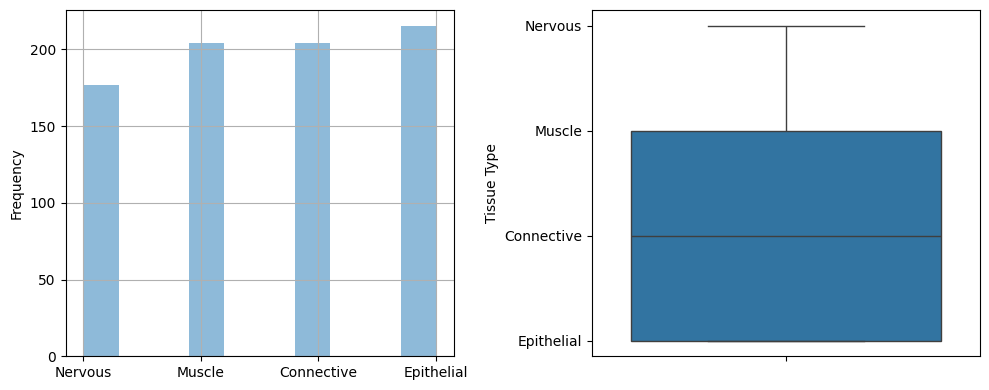

Growth Rate (mm/day)


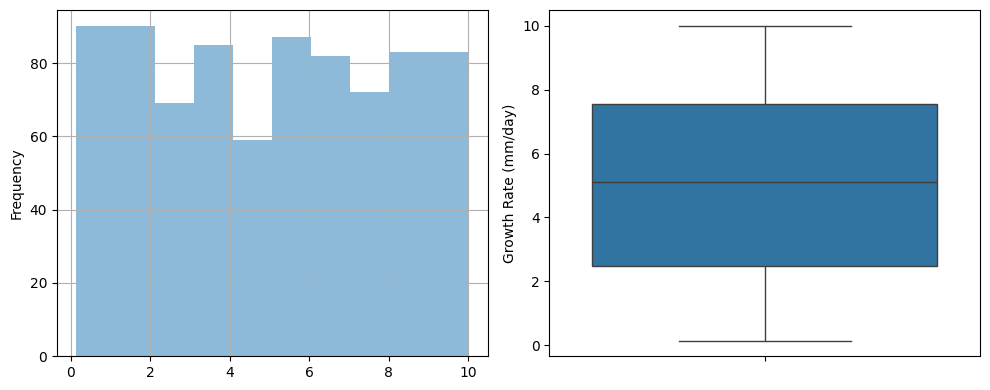

Days


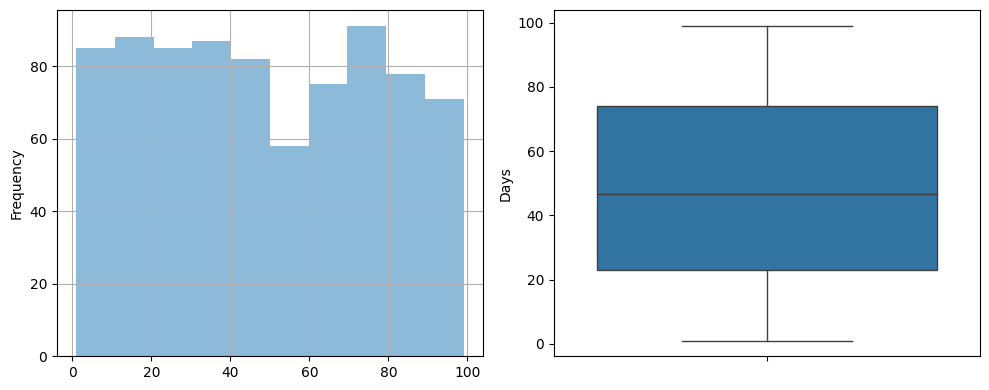

In [11]:
cols = Tissue_growth.columns
for col in cols:
    print(col)
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    Tissue_growth[col].hist(bins = 10, alpha = 0.5)
    plt.ylabel('Frequency')
    
    plt.subplot(1,2,2)
    sns.boxplot(y = Tissue_growth[col])
    plt.tight_layout()
    plt.show()

<Axes: xlabel='Growth Rate (mm/day)', ylabel='Days'>

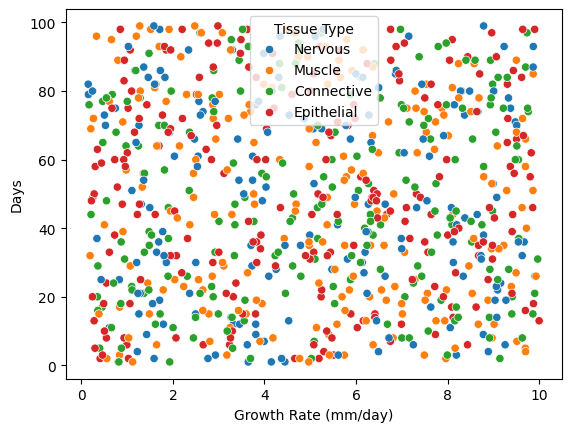

In [12]:
sns.scatterplot(x = Tissue_growth['Growth Rate (mm/day)'], y = Tissue_growth['Days'], hue = Tissue_growth['Tissue Type'])

In [13]:
X = Tissue_growth.drop(columns = ['Growth Rate (mm/day)', 'Tissue Type'])
Y = Tissue_growth['Growth Rate (mm/day)']

In [14]:
poly = PolynomialFeatures(degree = 5)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()

poly.fit(X_train_poly, y_train)
poly.fit(X_test_poly, y_test)
model.fit(X_train_poly, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test_poly)

In [17]:
print('R2 Squared', r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 Squared -0.04898044752475461
MSE 9.292847771980849
MAE 2.667030552860896


In [18]:
y_pred_test = model.predict(poly.fit_transform([[100]]))
y_pred_test

array([3.35060998])